# **Ibotta - Fraud Detection Capstone Project**

In [ ]:
# Mount the drive onto the Colab
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Ibotta - Fraud Detection')

Mounted at /content/drive


In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading all the financial tables into individual dataframes
df_trans = pd.read_csv('./Data/data_transTable.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1,1,1995-03-24,PRIJEM,VKLAD,1000,1000,NaN,NaN,NaN
1,5,1,1995-04-13,PRIJEM,PREVOD Z UCTU,3679,4679,NaN,AB,41403269.0
2,6,1,1995-05-13,PRIJEM,PREVOD Z UCTU,3679,20977,NaN,AB,41403269.0
3,7,1,1995-06-13,PRIJEM,PREVOD Z UCTU,3679,26835,NaN,AB,41403269.0
4,8,1,1995-07-13,PRIJEM,PREVOD Z UCTU,3679,30415,NaN,AB,41403269.0


In [ ]:
df_order = pd.read_csv('./Data/data_orderTable.csv')
df_loan = pd.read_csv('./Data/data_loanTable.csv')
df_district = pd.read_csv('./Data/data_districtTable.csv')
df_disp = pd.read_csv('./Data/data_dispTable.csv')
df_client = pd.read_csv('./Data/data_clientTable.csv')
df_card = pd.read_csv('./Data/data_cardTable.csv')
df_account = pd.read_csv('./Data/data_accountTable.csv')

Data Description

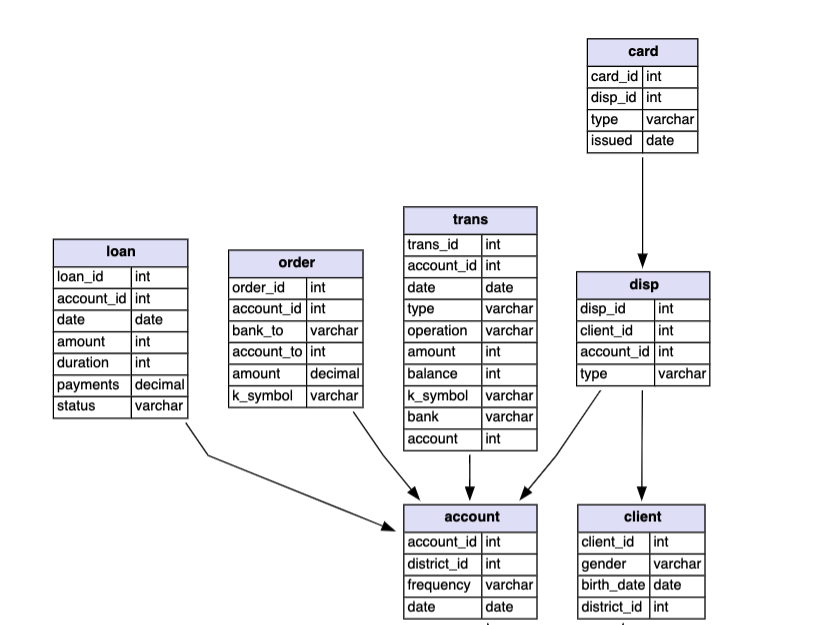

In [ ]:
df_loan.head()

,loan_id,account_id,date,amount,duration,payments,status
0,4959,2,1994-01-05,80952,24,3373.0,A
1,4961,19,1996-04-29,30276,12,2523.0,B
2,4962,25,1997-12-08,30276,12,2523.0,A
3,4967,37,1998-10-14,318480,60,5308.0,D
4,4968,38,1998-04-19,110736,48,2307.0,C


**`The 'status' column in the loan table signifies the credibility of the account_id. `**



```
A: Contract finished, no problems.
B: Contract finished, loan not paid.
C: Running contract, okay so far.
D: Running contract, client in debt```



In [ ]:
#Check to see how many samples of each class (A,B,C,D)
df_loan.groupby(df_loan['status'])['account_id'].count()

status
A    203
B     31
C    403
D     45
Name: account_id, dtype: int64

**A and C are good accounts = 606**<br>
**B and D are bad accounts = 76**<br>

**There are 11.1% bad accounts in the loan dataset**

In [ ]:
# How many banks are in the dataset of the transaction table ? 
df_trans.groupby('bank')['account_id'].count()

bank
AB    21720
CD    19597
EF    21293
GH    21499
IJ    20525
KL    21234
MN    19623
OP    21094
QR    22285
ST    21711
UV    21167
WX    20178
YZ    21582
Name: account_id, dtype: int64

**13 difference banks involved in the transaction table**

In [ ]:
# How many account_ID have a card and what is the issue date? 
  # Joining the loan and card table through disp table 
df_load_disp = pd.merge(df_loan, df_disp, how = 'outer', on = ['account_id'])

In [ ]:
df_loan_disp_card = pd.merge(df_load_disp, df_card, how = 'outer', on = ['disp_id'])

,loan_id,account_id,date,amount,duration,payments,status,disp_id,client_id,type_x,card_id,type_y,issued
0,4959.0,2,1994-01-05,80952.0,24.0,3373.0,A,2,2,OWNER,NaN,NaN,NaN
1,4959.0,2,1994-01-05,80952.0,24.0,3373.0,A,3,3,DISPONENT,NaN,NaN,NaN
2,4961.0,19,1996-04-29,30276.0,12.0,2523.0,B,25,25,OWNER,NaN,NaN,NaN
3,4962.0,25,1997-12-08,30276.0,12.0,2523.0,A,31,31,OWNER,NaN,NaN,NaN
4,4967.0,37,1998-10-14,318480.0,60.0,5308.0,D,45,45,OWNER,NaN,NaN,NaN


In [ ]:
# What was the balance of an account when loan was issued? 
df_loan_trans = pd.merge(df_loan, df_trans, how = 'outer', on = ['account_id'])

In [ ]:
df_loan_trans.head()

,loan_id,account_id,date_x,amount_x,duration,payments,status,trans_id,date_y,type,operation,amount_y,balance,k_symbol,bank,account
0,4959.0,2,1994-01-05,80952.0,24.0,3373.0,A,276,1993-02-26,PRIJEM,VKLAD,1100,1100,NaN,NaN,NaN
1,4959.0,2,1994-01-05,80952.0,24.0,3373.0,A,279,1993-03-12,PRIJEM,PREVOD Z UCTU,20236,21336,NaN,ST,66487163.0
2,4959.0,2,1994-01-05,80952.0,24.0,3373.0,A,280,1993-04-12,PRIJEM,PREVOD Z UCTU,20236,45286,NaN,ST,66487163.0
3,4959.0,2,1994-01-05,80952.0,24.0,3373.0,A,281,1993-05-12,PRIJEM,PREVOD Z UCTU,20236,54631,NaN,ST,66487163.0
4,4959.0,2,1994-01-05,80952.0,24.0,3373.0,A,282,1993-06-12,PRIJEM,PREVOD Z UCTU,30354,67530,NaN,ST,66487163.0


In [ ]:
df_loan_trans[df_loan_trans['account_id'] == 38].head()

,loan_id,account_id,date_x,amount_x,duration,payments,status,trans_id,date_y,type,operation,amount_y,balance,k_symbol,bank,account
1185,4968.0,38,1998-04-19,110736.0,48.0,2307.0,C,11261,1997-08-08,PRIJEM,VKLAD,1100,14941,NaN,NaN,NaN
1186,4968.0,38,1998-04-19,110736.0,48.0,2307.0,C,11269,1997-08-08,PRIJEM,PREVOD Z UCTU,13841,13841,NaN,YZ,66502475.0
1187,4968.0,38,1998-04-19,110736.0,48.0,2307.0,C,11270,1997-09-08,PRIJEM,PREVOD Z UCTU,13841,35430,NaN,YZ,66502475.0
1188,4968.0,38,1998-04-19,110736.0,48.0,2307.0,C,11271,1997-10-08,PRIJEM,PREVOD Z UCTU,13841,46699,NaN,YZ,66502475.0
1189,4968.0,38,1998-04-19,110736.0,48.0,2307.0,C,11272,1997-11-08,PRIJEM,PREVOD Z UCTU,13841,50024,NaN,YZ,66502475.0


In [ ]:
# Visualizing the average balance to loan ratio for each status 

df_loan['date'] = pd.to_datetime(df_loan['date'])
df_loan.rename(columns = {'date': 'loan_issue_date'}, inplace=True)

In [ ]:
df_loan.head()

,loan_id,account_id,loan_issue_date,amount,duration,payments,status
0,4959,2,1994-01-05,80952,24,3373.0,A
1,4961,19,1996-04-29,30276,12,2523.0,B
2,4962,25,1997-12-08,30276,12,2523.0,A
3,4967,37,1998-10-14,318480,60,5308.0,D
4,4968,38,1998-04-19,110736,48,2307.0,C


In [ ]:
df_trans['date'] = pd.to_datetime(df_trans['date'])
df_trans.rename(columns = {'date': 'transaction_date'}, inplace=True)

In [ ]:
df_loan_balance = pd.merge(df_loan, df_trans, how = 'inner', on = ['account_id'])

In [ ]:
import datetime
df_loan_balance_viz = pd.DataFrame()
for account in df_loan_balance['account_id'].unique():
  df_loan_balance_sub = df_loan_balance[df_loan_balance['account_id'] == account]
  df_loan_balance_sub['days_between_loan_issuance'] = df_loan_balance_sub['loan_issue_date'] -  df_loan_balance_sub['transaction_date']
  df_loan_balance_sub = df_loan_balance_sub.loc[df_loan_balance_sub['days_between_loan_issuance'] > datetime.timedelta(minutes = 1), :]
  
  df_loan_balance_sub = df_loan_balance_sub.loc[df_loan_balance_sub['days_between_loan_issuance'] == df_loan_balance_sub['days_between_loan_issuance'].min(), :]
  df_loan_balance_viz = df_loan_balance_viz.append(df_loan_balance_sub)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [ ]:
df_loan_balance_viz

,loan_id,account_id,loan_issue_date,amount_x,duration,payments,status,trans_id,transaction_date,type,operation,amount_y,balance,k_symbol,bank,account,days_between_loan_issuance
278,4959,2,1994-01-05,80952,24,3373.0,A,637,1993-12-31,VYDAJ,VYBER,15,27841,SLUZBY,NaN,NaN,5 days
417,4959,2,1994-01-05,80952,24,3373.0,A,3530492,1993-12-31,PRIJEM,NaN,138,27855,UROK,NaN,NaN,5 days
491,4961,19,1996-04-29,30276,12,2523.0,B,4546,1996-04-10,PRIJEM,PREVOD Z UCTU,15139,15854,NaN,OP,29053187.0,19 days
902,4962,25,1997-12-08,30276,12,2523.0,A,6308,1997-12-06,VYDAJ,PREVOD NA UCET,1110,31622,,AB,79838293.0,2 days
1166,4967,37,1998-10-14,318480,60,5308.0,D,11243,1998-10-12,VYDAJ,VYBER,11200,16368,NaN,NaN,NaN,2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190412,7295,11328,1998-07-18,280440,60,4674.0,C,3412636,1998-07-09,PRIJEM,VKLAD,10921,31303,NaN,NaN,NaN,9 days
190749,7304,11349,1995-10-29,419880,60,6998.0,C,3419993,1995-10-23,PRIJEM,VKLAD,300,24704,NaN,NaN,NaN,6 days
191081,7305,11359,1996-08-06,54024,12,4502.0,A,3423217,1996-07-31,VYDAJ,VYBER,15,25683,SLUZBY,NaN,NaN,6 days
191182,7305,11359,1996-08-06,54024,12,4502.0,A,3529969,1996-07-31,PRIJEM,NaN,110,25697,UROK,NaN,NaN,6 days


In [ ]:
df_loan_balance_viz = df_loan_balance_viz.groupby('status')['amount_x', 'balance'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df_loan_balance_viz

,amount_x,balance
status,,
A,95189.281690,44707.313380
B,156788.000000,46988.761905
C,169167.579737,44130.011257
D,254872.881356,25898.203390


In [ ]:
df_loan_balance_viz.reset_index(inplace = True)

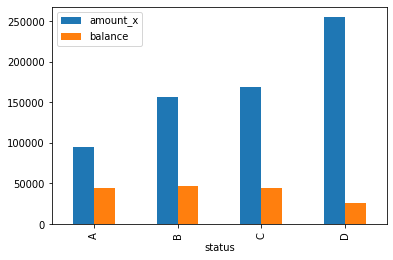

In [ ]:
df_loan_balance_viz.plot(x="status", y=["amount_x", "balance"], kind="bar")